In [31]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
tf.__version__
import cv2

In [32]:
# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                  shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('F:/Application/augmented data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 #color_mode="grayscale",
                                                 class_mode = 'binary')


Found 2065 images belonging to 2 classes.


In [33]:
# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('F:/Project/dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            #color_mode="grayscale",
                                            class_mode = 'binary')

Found 253 images belonging to 2 classes.


In [34]:
#Part 2 - Building the CNN

# Initialising the CNN
cnn = tf.keras.models.Sequential()

#Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=64, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))



In [35]:
cnn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 29, 29, 64)        18496     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 12544)             0         
                                                                 
 dense_4 (Dense)             (None, 128)              

In [36]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
history = cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
65/65 [==============================] - 18s 255ms/step - loss: 0.5894 - accuracy: 0.6838 - val_loss: 0.4642 - val_accuracy: 0.7708
Epoch 2/25
65/65 [==============================] - 16s 241ms/step - loss: 0.5445 - accuracy: 0.7240 - val_loss: 0.4291 - val_accuracy: 0.8024
Epoch 3/25
65/65 [==============================] - 15s 238ms/step - loss: 0.5133 - accuracy: 0.7530 - val_loss: 0.4539 - val_accuracy: 0.7945
Epoch 4/25
65/65 [==============================] - 16s 245ms/step - loss: 0.4756 - accuracy: 0.7821 - val_loss: 0.3507 - val_accuracy: 0.8379
Epoch 5/25
65/65 [==============================] - 16s 235ms/step - loss: 0.4659 - accuracy: 0.7797 - val_loss: 0.4036 - val_accuracy: 0.8103
Epoch 6/25
65/65 [==============================] - 15s 238ms/step - loss: 0.4357 - accuracy: 0.7985 - val_loss: 0.3426 - val_accuracy: 0.8379
Epoch 7/25
65/65 [==============================] - 18s 271ms/step - loss: 0.3982 - accuracy: 0.8232 - val_loss: 0.3204 - val_accuracy: 0.8538

In [37]:
#cnn.save('F:/Project/saved_models/cnn5_model.h5')

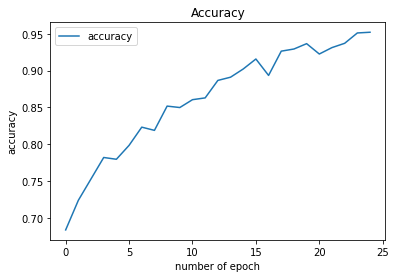

In [38]:
#plotting accuracy
history.history.keys()

import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('number of epoch')
plt.legend(['accuracy'],loc='upper left')
plt.show()


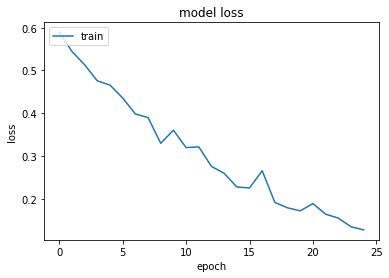

In [39]:
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train'],loc='upper left')
plt.show()

In [46]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

In [42]:
y_pred = cnn.predict(test_set, batch_size=32)

In [44]:
y_pred_bin = np.argmax(y_pred, axis=1)
y_test_bin = np.argmax(test_set, axis=1)

KeyboardInterrupt: 

In [ ]:
def plot_confusion_matrix(normalize):
  classes = ['Tumor','NonTumor']
  tick_marks = [0.5,1.5]
  cn = confusion_matrix(y_test_bin, y_pred_bin,normalize=normalize)
  sns.heatmap(cn,cmap='plasma',annot=True)
  plt.xticks(tick_marks, classes)
  plt.yticks(tick_marks, classes)
  plt.title('Confusion Matrix')
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()

print('Confusion Matrix without Normalization')
plot_confusion_matrix(normalize=None)

print('Confusion Matrix with Normalized Values')
plot_confusion_matrix(normalize='true')